In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Parquet file
data_file_parquet = '/Users/andre/github-classroom/rail_data_cleaned_20230728132300.parquet'
df = pd.read_parquet(data_file_parquet)


# Summary statistics of the dataset
print(df.describe())





      working_time_pass           working_time_arrival   
count                 0                          37100  \
mean                NaT  2023-07-28 02:07:39.208220928   
min                 NaT            2023-07-27 00:01:00   
25%                 NaT            2023-07-27 19:55:00   
50%                 NaT            2023-07-27 23:20:00   
75%                 NaT            2023-07-28 07:54:00   
max                 NaT            2023-07-29 02:15:00   
std                 NaN                            NaN   

              working_time_departure           planned_time_arrival   
count                          37100                          33855  \
mean   2023-07-28 02:07:31.254582272  2023-07-28 02:31:47.884802816   
min              2023-07-27 00:01:00            2023-07-27 00:01:00   
25%              2023-07-27 19:55:00            2023-07-27 19:54:00   
50%              2023-07-27 23:21:00            2023-07-27 23:19:00   
75%              2023-07-28 07:55:00            202

In [11]:
print(df.head())

           route_id unique_id service_start_date update_origin train_platform   
8   202307277679020    L79020         2023-07-27        Darwin           STFD  \
10  202307277679020    L79020         2023-07-27        Darwin        SPNY205   
16  202307277679020    L79020         2023-07-27        Darwin         PADTLL   
17  202307277679020    L79020         2023-07-27        Darwin        WBRNPKS   
22  202307277674553    L74553         2023-07-27            TD        SVNOAKS   

   working_time_pass working_time_arrival working_time_departure   
8                NaT  2023-07-27 00:03:00    2023-07-27 00:03:30  \
10               NaT  2023-07-27 00:07:00    2023-07-27 00:13:30   
16               NaT  2023-07-27 00:30:30    2023-07-27 00:31:00   
17               NaT  2023-07-27 00:33:00    2023-07-27 00:35:00   
22               NaT  2023-07-27 21:53:00    2023-07-27 21:54:30   

   planned_time_arrival planned_time_departure  pass platform train_length   
8                   NaT   

In [12]:
# Check for missing values
print(df.isnull().sum())


route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64


In [13]:
# Data types of columns
print(df.dtypes)


route_id                          object
unique_id                         object
service_start_date                object
update_origin                     object
train_platform                    object
working_time_pass         datetime64[ns]
working_time_arrival      datetime64[ns]
working_time_departure    datetime64[ns]
planned_time_arrival      datetime64[ns]
planned_time_departure    datetime64[ns]
pass                             float64
platform                          object
train_length                      object
actual_arrival_time       datetime64[ns]
actual_departure_time     datetime64[ns]
is_delayed_arrival                  bool
is_delayed_departure                bool
dtype: object


In [14]:
# Explore unique values in categorical columns
categorical_columns = ['update_origin', 'train_platform', 'platform']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in update_origin: ['Darwin' 'TD' 'CIS' 'Trust' None 'Tyrell' 'Workstation']
Unique values in train_platform: ['STFD' 'SPNY205' 'PADTLL' ... 'NEILTBS' 'THUSTON' 'PRKSTON']
Unique values in platform: ['5' None 'B' 'A' '1' '8' '2' '4' '3' '10' 'CL' 'BUS' '6' '4A' '12B' '7'
 '7N' '0' '14' '3B' 'UDG' '9' 'SDG' '15' '13' '5B' 'HS' 'DTS' '12' '11'
 '15A' '12C' '4B' 'S1' '9C' '5A' '3A' 'DER' '10A' '17' '12A' '16' '6A'
 '11A' '1B' 'URS' '11B' '2B' 'D' 'RES' 'C' 'DTL' '15B' '1A' '1L' '9B' '2A'
 '19' '8D' '7B' 'UML' '9E' 'UDS' '8B' '6B' '7A' 'S4' 'TBC' '9A' 'EXE'
 'SGL' 'DM' '16A' '11D' 'DOR' 'S3' '13B' 'TRU' '8A' '16B' 'GL1' '14A'
 'DRL' 'DG' '14B' 'NEW' 'EXM' 'FAL' '2F' '6N' '1C' 'PLY' 'UPL' 'GUN']


In [15]:
# Frequency count for 'update_origin'
update_origin_counts = df['update_origin'].value_counts()
print(update_origin_counts)

# Frequency count for 'train_platform'
train_platform_counts = df['train_platform'].value_counts()
print(train_platform_counts)

# Frequency count for 'platform'
platform_counts = df['platform'].value_counts()
print(platform_counts)


update_origin
CIS            14433
TD             10576
Darwin          8983
Trust           2203
Tyrell           292
Workstation       28
Name: count, dtype: int64
train_platform
LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
          ... 
PRTSMTA      1
CHAPLTN      1
DIDCTNJ      1
WANTRD       1
PRKSTON      1
Name: count, Length: 2603, dtype: int64
platform
2      12802
1      12575
3       2946
4       2005
5        709
       ...  
GL1        1
16B        1
9E         1
TRU        1
2B         1
Name: count, Length: 93, dtype: int64


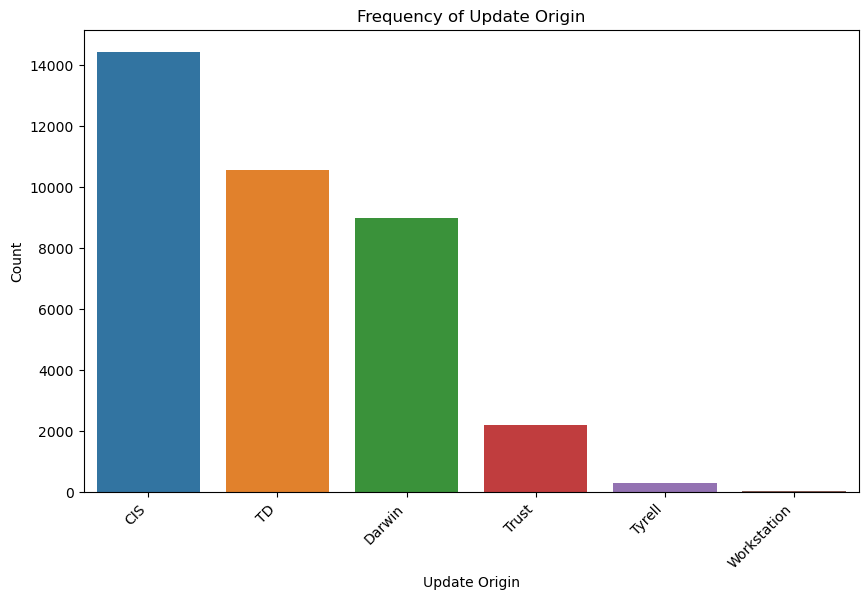

In [17]:
# Frequency count data
update_origin_counts = {
    'CIS': 14433,
    'TD': 10576,
    'Darwin': 8983,
    'Trust': 2203,
    'Tyrell': 292,
    'Workstation': 28
}

train_platform_counts = {
    'LNDNBDE': 317,
    'WLOE': 166,
    'ECROYDN': 147,
    'CRKLWD': 147,
    'STKP': 147,
    # ...
}

platform_counts = {
    '2': 12802,
    '1': 12575,
    '3': 2946,
    '4': 2005,
    '5': 709,
    # ...
}

# Bar plot for 'update_origin'
plt.figure(figsize=(10, 6))
sns.barplot(x=list(update_origin_counts.keys()), y=list(update_origin_counts.values()))
plt.xlabel('Update Origin')
plt.ylabel('Count')
plt.title('Frequency of Update Origin')
plt.xticks(rotation=45, ha='right')
plt.show()


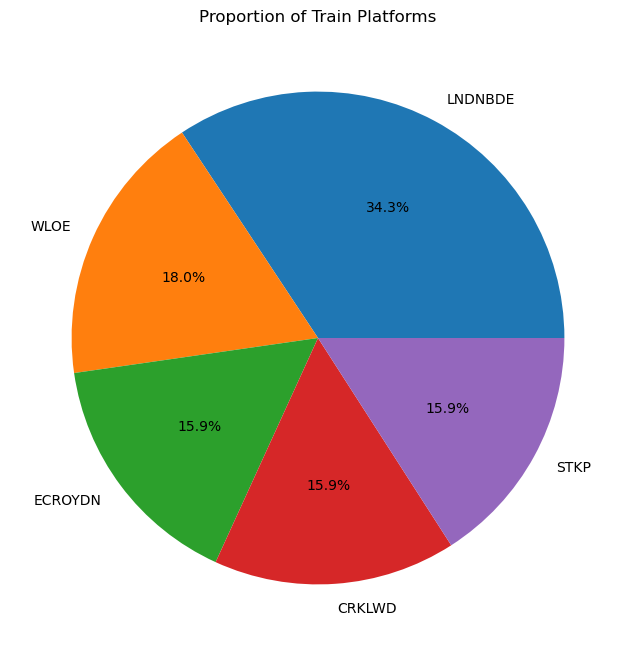

In [18]:
# Pie chart for 'train_platform'
plt.figure(figsize=(8, 8))
plt.pie(list(train_platform_counts.values()), labels=list(train_platform_counts.keys()), autopct='%1.1f%%')
plt.title('Proportion of Train Platforms')
plt.show()


In [22]:


# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the total number of missing values in each column
print("Missing values in each column:")
print(missing_values)

# If you want to see the percentage of missing values in each column:
total_rows = df.shape[0]
percentage_missing = (missing_values / total_rows) * 100

print("\nPercentage of missing values in each column:")
print(percentage_missing)


Missing values in each column:
route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64

Percentage of missing values in each column:
route_id                    0.000000
unique_id                   0.000000
service_start_date          0.000000
update_origin               1.576819
train_platform              0.000000
working_time_pass         100.000000
working_time_arrival        0.000000
working_time_departure      0.000000
planned_time_arrival        8.746631
planned_time_departure      9.487

## Connected from PostAdmin to AWS +
## Setting up pipeline - Tomorrow / Monday 
## More EDA - The whole time
## Docker-compose file -  Tomorrow / Monday
## Created an account for API +
## Make a commit to see if we run into issues +

In [23]:
station_visits = df['train_platform'].value_counts()

# Sort the stations based on visit counts in descending order
sorted_stations = station_visits.sort_values(ascending=False)

# Select the top 10 stations with the highest visit counts
top_10_stations = sorted_stations.head(10)

print(top_10_stations)

train_platform
LNDNBDE    317
WLOE       166
ECROYDN    147
STKP       147
CRKLWD     147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
Name: count, dtype: int64


In [34]:
print(df['working_time_pass'])

8       NaT
10      NaT
16      NaT
17      NaT
22      NaT
         ..
94233   NaT
94235   NaT
94238   NaT
94240   NaT
94243   NaT
Name: working_time_pass, Length: 37100, dtype: datetime64[ns]


In [35]:
print(df['working_time_arrival'])

8       2023-07-27 00:03:00
10      2023-07-27 00:07:00
16      2023-07-27 00:30:30
17      2023-07-27 00:33:00
22      2023-07-27 21:53:00
                ...        
94233   2023-07-27 17:30:30
94235   2023-07-27 17:44:00
94238   2023-07-27 17:58:30
94240   2023-07-27 18:08:30
94243   2023-07-27 18:18:30
Name: working_time_arrival, Length: 37100, dtype: datetime64[ns]


In [37]:
print(df['planned_time_arrival'])

8                       NaT
10                      NaT
16                      NaT
17                      NaT
22      2023-07-27 21:53:00
                ...        
94233   2023-07-27 17:31:00
94235   2023-07-27 17:44:00
94238   2023-07-27 17:59:00
94240   2023-07-27 18:09:00
94243   2023-07-27 18:19:00
Name: planned_time_arrival, Length: 37100, dtype: datetime64[ns]


In [39]:
print(df['actual_arrival_time'])

8       2023-07-27 00:53:00
10      2023-07-27 00:57:00
16      2023-07-27 01:07:00
17      2023-07-27 01:09:00
22                      NaT
                ...        
94233   2023-07-27 18:07:00
94235   2023-07-27 18:18:00
94238   2023-07-27 18:29:00
94240   2023-07-27 18:35:00
94243   2023-07-27 18:44:00
Name: actual_arrival_time, Length: 37100, dtype: datetime64[ns]


In [40]:
print(df['actual_departure_time'])

8       2023-07-27 00:53:00
10      2023-07-27 00:58:00
16      2023-07-27 01:07:00
17      2023-07-27 01:10:00
22                      NaT
                ...        
94233   2023-07-27 18:08:00
94235   2023-07-27 18:19:00
94238   2023-07-27 18:30:00
94240   2023-07-27 18:35:00
94243   2023-07-27 18:45:00
Name: actual_departure_time, Length: 37100, dtype: datetime64[ns]


In [43]:


df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'])

# Define the desired 12-hour clock format with AM/PM indicators
time_format_12h = "%I:%M:%S %p"

# Format the 'actual_departure_time' column to 12-hour clock format
formatted_time = df['actual_departure_time'].dt.strftime(time_format_12h)

# Concatenate the date and time to get the final result
df['formatted_departure_time'] = df['actual_departure_time'].dt.strftime("%Y-%m-%d") + " " + formatted_time

# Display the DataFrame with the formatted date and time
print(df['formatted_departure_time'])



C:\Users\andre\AppData\Local\Temp\ipykernel_2348\687118461.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'])


8        2023-08-03 12:53:00 AM
10       2023-08-03 12:58:00 AM
16       2023-08-03 01:07:00 AM
17       2023-08-03 01:10:00 AM
22                          NaN
                  ...          
94233    2023-08-03 06:08:00 PM
94235    2023-08-03 06:19:00 PM
94238    2023-08-03 06:30:00 PM
94240    2023-08-03 06:35:00 PM
94243    2023-08-03 06:45:00 PM
Name: formatted_departure_time, Length: 37100, dtype: object


In [4]:
df_csv = pd.read_csv('/Users/andre/github-classroom/RailReferences.csv')
df_csv.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [84]:
df.size

630700

In [67]:
df_csv.loc[df_csv['TiplocCode']=='STFD']

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
2265,9100STFD,STFD,SRA,Stratford (London) Rail Station,NaN,U,538557,184444,2003-11-04T00:00:00,2009-10-05T17:34:50,2,rev


In [56]:
print(df_csv.dtypes)


AtcoCode                 object
TiplocCode               object
CrsCode                  object
StationName              object
StationNameLang         float64
GridType                 object
Easting                   int64
Northing                  int64
CreationDateTime         object
ModificationDateTime     object
RevisionNumber            int64
Modification             object
dtype: object


In [5]:
merged_df = df.merge(df_csv, left_on='train_platform', right_on='TiplocCode', how = 'right') #Anything on the right table (df_csv) that will stay(main table) and if it matches, we add from the left table(df)
print(merged_df)

              route_id unique_id service_start_date update_origin   
0      202307278077713    P77713         2023-07-27         Trust  \
1                  NaN       NaN                NaN           NaN   
2      202307278075788    P75788         2023-07-27         Trust   
3      202307278075802    P75802         2023-07-27         Trust   
4      202307288075712    P75712         2023-07-28           CIS   
...                ...       ...                ...           ...   
34852              NaN       NaN                NaN           NaN   
34853  202307288001533    P01533         2023-07-28        Darwin   
34854  202307278001530    P01530         2023-07-27         Trust   
34855  202307278000765    P00765         2023-07-27         Trust   
34856              NaN       NaN                NaN           NaN   

      train_platform working_time_pass working_time_arrival   
0            PENZNCE               NaT  2023-07-27 00:42:00  \
1                NaN               NaT       

In [6]:
merged_df.size

1010853

## Top 10 Most Visted Station

In [7]:
station_visits = merged_df['StationName'].value_counts()

# Sort the stations based on visit counts in descending order
sorted_stations = station_visits.sort_values(ascending=False)

# Select the top 10 stations with the highest visit counts
top_10_stations_merged = sorted_stations.head(10)

print(top_10_stations_merged)

StationName
London Bridge Rail Station           318
Clapham Junction Rail Station        263
London Waterloo East Rail Station    166
East Croydon Rail Station            147
Cricklewood Rail Station             147
Stockport Rail Station               147
Vauxhall Rail Station                133
Reading Rail Station                 125
Gatwick Airport Rail Station         118
London Blackfriars Rail Station      117
Name: count, dtype: int64


## Top 10 Stations Vistied in a Day

In [56]:
# Extract the date from the working_time_arrival column
merged_df['date'] = merged_df['working_time_arrival'].dt.date

# Group by StationName and date, then count occurrences
station_counts = merged_df.groupby(['StationName', 'date']).size().reset_index(name='count')

# Sort stations by count in descending order
station_counts_sorted = station_counts.sort_values(by='count', ascending=False)

# Get the top 10 most visited stations
top_10_stations = station_counts_sorted.head(10)

print(top_10_stations)



                                          StationName        date  count
699                     Clapham Junction Rail Station  2023-07-27    102
1836                       London Bridge Rail Station  2023-07-28     99
1835                       London Bridge Rail Station  2023-07-27     90
2378                             Reading Rail Station  2023-07-27     71
2734                           Stockport Rail Station  2023-07-28     56
700                     Clapham Junction Rail Station  2023-07-28     55
2959                            Vauxhall Rail Station  2023-07-28     52
1841  London St Pancras International LL Rail Station  2023-07-27     47
2958                            Vauxhall Rail Station  2023-07-27     40
293                              Bickley Rail Station  2023-07-27     37


In [44]:
merged_df['planned_time_arrival'] = pd.to_datetime(merged_df['planned_time_arrival'])
merged_df['working_time_arrival'] = pd.to_datetime(merged_df['working_time_arrival'])

# Calculate delay for each train
merged_df['delay'] = merged_df['working_time_arrival'] - merged_df['planned_time_arrival']

# Group by train and calculate total delay for each train
train_delays = merged_df.groupby('StationName')['delay'].sum()

# Find the train with the most delays
most_delayed_train = train_delays.idxmax()
max_delay = train_delays.max()

print(f"Train with the most delays: {most_delayed_train}")


Train with the most delays: Duke Street Rail Station


In [57]:
# Convert relevant columns to datetime format
merged_df['planned_time_arrival'] = pd.to_datetime(merged_df['planned_time_arrival'])
merged_df['working_time_arrival'] = pd.to_datetime(merged_df['working_time_arrival'])

# Calculate delay for each train
merged_df['delay'] = merged_df['working_time_arrival'] - merged_df['planned_time_arrival']

# Filter out negative delays
merged_df = merged_df[merged_df['delay'] >= pd.Timedelta(0)]

# Group by train and calculate total delay for each train
train_delays = merged_df.groupby('StationName')['delay'].sum()

# Find the train with the least delays
least_delayed_train = train_delays.idxmin()
min_delay = train_delays.min()

print(f"Train with the least delays: {least_delayed_train}")


Train with the least delays: Abbey Wood (London) Rail Station


In [41]:
merged_df['CreationDateTime'] = pd.to_datetime(merged_df['CreationDateTime'])

# Find the train with the oldest service start date
oldest_train = merged_df.loc[merged_df['CreationDateTime'].idxmax()]

print("Oldest Train:")
print(oldest_train)

Oldest Train:
route_id                          202307278070018
unique_id                                  P70018
service_start_date            2017-11-12 21:49:11
update_origin                                 CIS
train_platform                            KENLSTN
working_time_pass                             NaT
working_time_arrival          2023-07-27 18:07:00
working_time_departure        2023-07-27 18:08:00
planned_time_arrival          2023-07-27 18:07:00
planned_time_departure        2023-07-27 18:08:00
pass                                          NaN
platform                                        1
train_length                                    2
actual_arrival_time           2023-07-27 18:07:00
actual_departure_time         2023-07-27 18:08:00
is_delayed_arrival                          False
is_delayed_departure                        False
AtcoCode                              9100KENLSTN
TiplocCode                                KENLSTN
CrsCode                             

In [42]:
merged_df['CreationDateTime'] = pd.to_datetime(merged_df['CreationDateTime'])

# Find the train with the oldest service start date
youngest_train = merged_df.loc[merged_df['CreationDateTime'].idxmin()]

print("youngest Train:")
print(youngest_train)

youngest Train:
route_id                          202307278075788
unique_id                                  P75788
service_start_date            2003-11-04 00:00:00
update_origin                               Trust
train_platform                            CARBISB
working_time_pass                             NaT
working_time_arrival          2023-07-27 18:07:00
working_time_departure        2023-07-27 18:07:30
planned_time_arrival          2023-07-27 18:06:00
planned_time_departure        2023-07-27 18:06:00
pass                                          NaN
platform                                        1
train_length                                 None
actual_arrival_time                           NaT
actual_departure_time         2023-07-27 18:06:00
is_delayed_arrival                          False
is_delayed_departure                        False
AtcoCode                              9100CARBISB
TiplocCode                                CARBISB
CrsCode                           

In [39]:

pd.set_option('display.max_rows', None)  # Set the option to display all rows

# Display the "planned_time_arrival" column
print(merged_df['actual_arrival_time'])

# After viewing the output, you can reset the display option if needed
pd.reset_option('display.max_rows')


2                       NaT
4       2023-07-28 07:35:00
5       2023-07-27 22:14:00
7       2023-07-27 20:43:00
9       2023-07-28 21:25:00
15      2023-07-27 22:27:00
16      2023-07-27 23:00:00
17      2023-07-27 20:42:00
19      2023-07-28 07:40:00
20      2023-07-28 10:30:00
22      2023-07-28 08:21:00
23      2023-07-28 10:30:00
28                      NaT
29      2023-07-27 22:06:00
31      2023-07-27 22:11:00
34      2023-07-27 00:51:00
35      2023-07-27 20:06:00
36      2023-07-27 20:22:00
38      2023-07-28 06:47:00
39      2023-07-27 22:17:00
40      2023-07-27 22:50:00
44      2023-07-27 22:00:00
46      2023-07-27 22:38:00
47      2023-07-27 22:05:00
49      2023-07-28 10:15:00
52      2023-07-28 08:06:00
53      2023-07-28 10:15:00
54      2023-07-27 00:45:00
55      2023-07-27 20:00:00
56      2023-07-27 20:16:00
57      2023-07-27 23:24:00
58      2023-07-27 23:09:00
60      2023-07-27 22:11:00
61      2023-07-27 22:44:00
67                      NaT
68                  

In [43]:

# Remove rows where actual_arrival_time is NaT
merged_df_cleaned = merged_df.dropna(subset=['actual_arrival_time'])

# Now merged_df_cleaned contains only rows where actual_arrival_time is not NaT
merged_df_cleaned

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,time_bin,delay,day_of_week,delay_minutes,arrival_delay_minutes
4,202307288075712,P75712,2003-11-04,CIS,CARBISB,NaT,2023-07-28 07:35:00,2023-07-28 07:35:30,2023-07-28 07:35:00,2023-07-28 07:35:00,...,38745,2003-11-04,2011-09-30T14:47:28,5,rev,NaN,0 days,4.0,0.0,0.0
5,202307278075392,P75392,2003-11-04,Darwin,STERTH,NaT,2023-07-27 22:14:00,2023-07-27 22:15:30,2023-07-27 22:14:00,2023-07-27 22:15:00,...,35730,2003-11-04,2007-02-13T17:06:21,3,rev,NaN,0 days,3.0,0.0,0.0
7,202307277159576,G59576,2003-11-04,Trust,STERTH,NaT,2023-07-27 20:36:00,2023-07-27 20:37:30,2023-07-27 20:36:00,2023-07-27 20:37:00,...,35730,2003-11-04,2007-02-13T17:06:21,3,rev,NaN,0 days,3.0,0.0,7.0
9,202307287159582,G59582,2003-11-04,CIS,STERTH,NaT,2023-07-28 21:25:00,2023-07-28 21:26:30,2023-07-28 21:25:00,2023-07-28 21:26:00,...,35730,2003-11-04,2007-02-13T17:06:21,3,rev,NaN,0 days,4.0,0.0,0.0
15,202307278075392,P75392,2003-11-04,TD,STERTH,NaT,2023-07-27 22:14:00,2023-07-27 22:15:30,2023-07-27 22:14:00,2023-07-27 22:15:00,...,35730,2003-11-04,2007-02-13T17:06:21,3,rev,NaN,0 days,3.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,202307277673815,L73815,2005-04-21,Darwin,BRSR,NaT,2023-07-27 19:10:00,2023-07-27 19:11:00,2023-07-27 19:10:00,2023-07-27 19:11:00,...,167997,2005-04-21,2006-09-18T18:24:34,2,rev,NaN,0 days,3.0,0.0,2.0
34839,202307277673931,L73931,2005-04-21,TD,BRSR,NaT,2023-07-27 01:42:00,2023-07-27 01:43:00,2023-07-27 01:42:00,NaT,...,167997,2005-04-21,2006-09-18T18:24:34,2,rev,NaN,0 days,3.0,0.0,0.0
34840,202307278000373,P00373,2003-11-04,Darwin,ACLE,NaT,2023-07-27 17:55:00,2023-07-27 17:56:00,2023-07-27 17:55:00,2023-07-27 17:56:00,...,310000,2003-11-04,2006-09-18T18:24:34,2,rev,NaN,0 days,3.0,0.0,7.0
34847,202307288001533,P01533,2003-11-04,Darwin,HADISCO,NaT,2023-07-28 05:51:00,2023-07-28 05:51:30,2023-07-28 05:51:00,2023-07-28 05:51:00,...,298493,2003-11-04,2008-12-01T15:27:09,2,rev,NaN,0 days,4.0,0.0,0.0


## Station Traffic by Hour

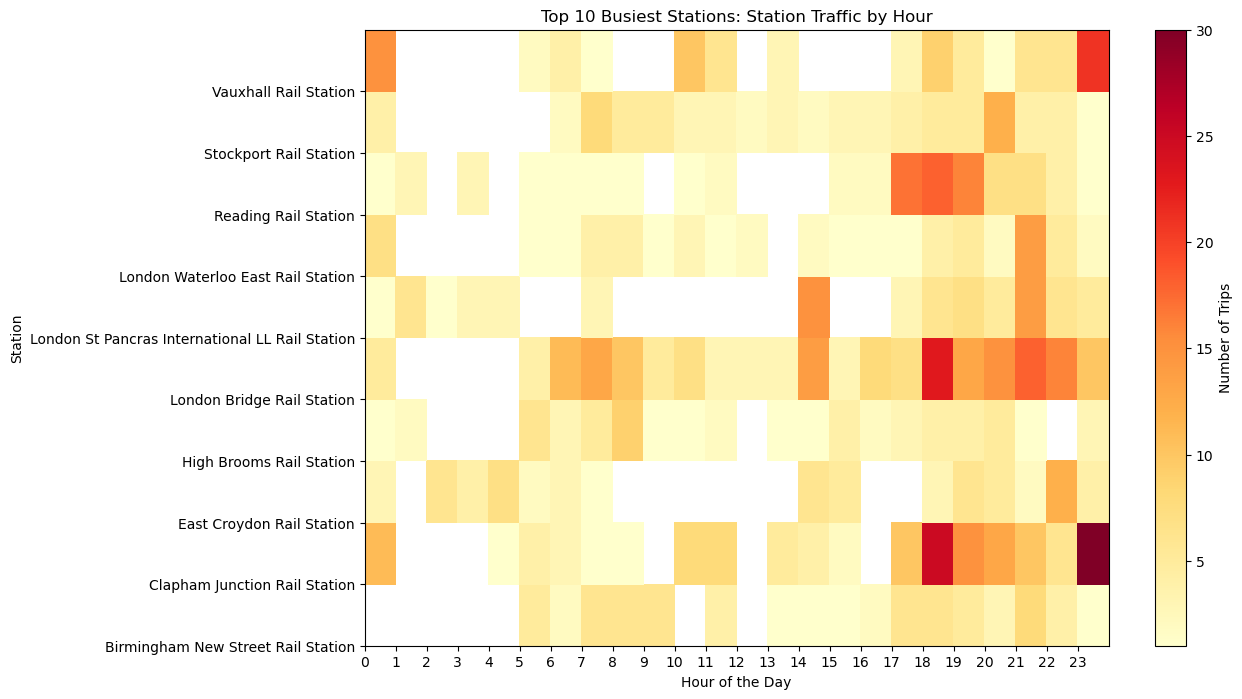

In [52]:

# Extract the hour from the working_time_arrival column
merged_df['hour'] = merged_df['working_time_arrival'].dt.hour

# Calculate the total number of trips for each station
station_total_trips = merged_df['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_stations = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df = merged_df[merged_df['StationName'].isin(top_10_stations)]

# Group by StationName and hour, then count occurrences
station_hourly_counts = top_10_df.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data = station_hourly_counts.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()



## Top 10 Routes and Stations with Delays in Seconds and Minutes

In [54]:
# Extract the total seconds from the timedelta values
top_delays_in_seconds = top_delays.apply(lambda x: x.total_seconds())

# Print the delays in seconds
print("Top 10 Routes and Stations with Delays in Seconds:")
print(top_delays_in_seconds)

# Convert the delays to minutes
top_delays_in_minutes = top_delays_in_seconds / 60

# Print the delays in minutes
print("Top 10 Routes and Stations with Delays in Minutes:")
print(top_delays_in_minutes)

Top 10 Routes and Stations with Delays in Seconds:
route_id         StationName                     
202307278933974  Duke Street Rail Station            86310.0
202307287195245  New Beckenham Rail Station          86310.0
202307277123518  Doncaster Rail Station               1800.0
                 Grantham Rail Station                1800.0
                 Newark North Gate Rail Station       1140.0
202307277123494  Doncaster Rail Station                900.0
                 Newark North Gate Rail Station        750.0
202307277123518  Peterborough Rail Station             600.0
202307277621889  Gillingham (Dorset) Rail Station      600.0
                 Templecombe Rail Station              300.0
Name: delay, dtype: float64
Top 10 Routes and Stations with Delays in Minutes:
route_id         StationName                     
202307278933974  Duke Street Rail Station            1438.5
202307287195245  New Beckenham Rail Station          1438.5
202307277123518  Doncaster Rail Station 